In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Personal Portfolio\\Python - Data Science\\Vehicle Sales\\car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


- year: The manufacturing year of the vehicle.
- make:
- model:
- trim:
- body:
- transmission: The type of transmission in the vehicle (e.g., automatic).
- vin: vehicle identification number (unique code for each vehicle).
- state: the state where the vehicle is registered
- condition: condition of the vehicle, possibly rated on scale.
- odometer: The mileage or distance traveled by the vehicle.
- color: exterior color of the vehicle
- interior: interior color of the vehicle
- seller: the entity selling the vehicle
- mmr: Manheim Market Report, indicating the estimated market value of the vehicle.
- selling price: the price at which the vehicle was sold
- saledate: The date and time when the vehicle was sold

### Rename Columns

- It's quite ambiguous to understand the condition column. It is actually the depreciation rate of the car. 
- Imagine a new car worths 35,880 dollar (new car value) and after a period of time its value is 23,700 (current car value).
- The depreciation rate = ((new car value - current car value)/new car value) * 100
- In the example I provided, the depreciation is calculated as ((35,880-23,700)/35,880) * 100 = 33.94
- I'll rename the condition column to dep_rate for accuracy

In [3]:
df = df.rename(columns = {"condition": "dep_rate"})

### Investigating the dataset

In [4]:
print("The number of columns:", df.shape[1])
print("The number of rows:", df.shape[0])

The number of columns: 16
The number of rows: 558837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   dep_rate      547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [6]:
duplicate = df.duplicated().sum() # check duplicates
if (duplicate != 0):
    print("The number of duplicates:", duplicate)
else:
    print("There are no duplicates")

There are no duplicates


### Dataset Cleaning

In [7]:
df.isnull().sum() # no of null values in each column

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
dep_rate        11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
df_clean = df.dropna(subset=["make", "body", "transmission", "dep_rate", "odometer", "mmr", "sellingprice"]) # remove null values in specific columns
df_clean.head()

,year,make,model,trim,body,transmission,vin,state,dep_rate,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [9]:
df_clean.isnull().sum() # no of null values in each column

year              0
make              0
model            92
trim              0
body              0
transmission      0
vin               0
state             0
dep_rate          0
odometer          0
color           548
interior        548
seller            0
mmr               0
sellingprice      0
saledate          0
dtype: int64

In [10]:
df_clean = df_clean.drop(columns = ["vin", "seller", "saledate"]) # drop unused columns
df_clean.head()

,year,make,model,trim,body,transmission,state,dep_rate,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0


- We check if there are any potential mispelling or inconsistent capitalization in the columns to make it accurate. For example, the body column, Suv can be written as SUV or SUV. 
- We need to double check and modify it

In [11]:
unique_values = df_clean['body'].unique() # check unique values
unique_values

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Koup', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'Transit Van',
       'van', 'regular-cab', 'suv', 'g sedan', 'g coupe', 'hatchback',
       'king cab', 'supercrew', 'g convertible', 'coupe', 'crew cab',
       'wagon', 'e-series van', 'regular cab', 'quad cab',
       'g37 convertible', 'supercab', 'extended cab', 'crewmax cab',
       'double c

In [12]:
bodytype_counts = df_clean['body'].value_counts() # count unique values
print(bodytype_counts)

Sedan          174944
SUV            100435
sedan           36717
suv             20636
Hatchback       19374
                ...  
Cab Plus            3
cab plus 4          1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: body, Length: 85, dtype: int64


As we can see from the output, SUV and suv are the same, but they are written in different capitalization. Now we change convert the entire column to lowercase

In [13]:
df_clean["body"] = df_clean["body"].str.lower()
updated_unique_values = df_clean['body'].unique() # check unique values after applying lowercases
updated_unique_values

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'cts coupe', 'supercrew', 'e-series van',
       'extended cab', 'supercab', 'g convertible', 'koup', 'regular cab',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'beetle convertible', 'tsx sport wagon',
       'promaster cargo van', 'cab plus', 'granturismo convertible',
       'cts-v wagon', 'ram van', 'transit van', 'regular-cab'],
      dtype=object)

In [14]:
updated_bodytype_counts = df_clean['body'].value_counts() # count updated unique values
print(updated_bodytype_counts)

sedan                      211661
suv                        121071
hatchback                   23847
minivan                     21943
coupe                       15996
crew cab                    14257
wagon                       14236
convertible                  9359
supercrew                    7573
g sedan                      6944
supercab                     4185
regular cab                  4073
extended cab                 3960
quad cab                     3517
van                          3515
g coupe                      1504
double cab                   1468
e-series van                 1108
crewmax cab                   488
king cab                      446
g convertible                 306
access cab                    266
genesis coupe                 255
koup                          162
club cab                      150
cts coupe                     120
mega cab                       97
elantra coupe                  87
promaster cargo van            56
beetle convert

Now do the same thing for make column

In [15]:
make_unique = df_clean["make"].unique()
make_unique

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Buick', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Geo', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [16]:
make_count = df_clean["make"].value_counts()
make_count

Ford             81186
Chevrolet        54177
Nissan           44082
Toyota           35319
Dodge            27188
Honda            24784
Hyundai          18669
BMW              17670
Kia              15829
Chrysler         15137
Mercedes-Benz    14129
Infiniti         14022
Jeep             12737
Volkswagen       10785
Lexus            10411
GMC               9222
Mazda             6931
Cadillac          6318
Lincoln           4951
Audi              4812
Acura             4504
Buick             4471
Subaru            4369
Ram               4044
Pontiac           4019
Mitsubishi        3661
Volvo             3086
MINI              2953
Saturn            2571
Mercury           1574
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             978
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley            105
Aston Marti

- The make column looks fine, without any errors in mispelling and capitalization.
- Now we look at transmission column.

In [17]:
transmission_unique = df_clean["transmission"].unique()
transmission_unique

array(['automatic', 'manual'], dtype=object)

In [18]:
transmission_count = df_clean["transmission"].value_counts()
transmission_count

automatic    456583
manual        16378
Name: transmission, dtype: int64

- The transmission column looks fine, without any errors in mispelling and capitalization.

### Exploring the dataset

In [19]:
import seaborn as sns
df_numerical_cor = df_clean.drop(["year"], axis=1).select_dtypes(include="number").corr()
df_numerical_cor

,dep_rate,odometer,mmr,sellingprice
dep_rate,1.000000,-0.314394,0.276124,0.317061
odometer,-0.314394,1.000000,-0.581556,-0.576271
mmr,0.276124,-0.581556,1.000000,0.983633
sellingprice,0.317061,-0.576271,0.983633,1.000000


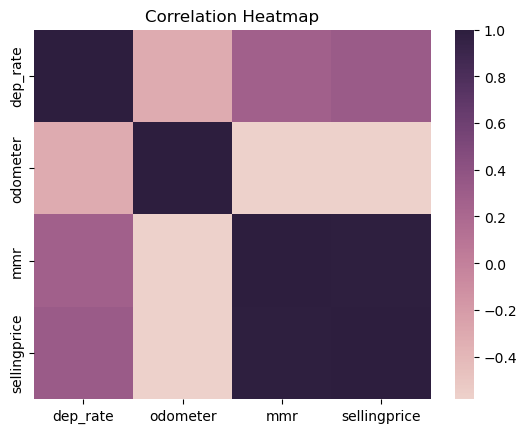

In [20]:
custom_cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(df_numerical_cor, cmap=custom_cmap)
plt.title("Correlation Heatmap")
plt.show()

- As we can observe, there is low correlations between variables. 
- Although sellingprice has a very strong correlation with mmr, but it does not give useful information as one is the market value, and one is the actual sale value.

Now, we find out basic information about the most and least cars sold throughout the period.

In [29]:
cars_year = df_clean.groupby("year")["make"].count().reset_index(name = "count")
cars_year.head(6)

,year,count
0,1990,33
1,1991,51
2,1992,97
3,1993,127
4,1994,286
5,1995,485


In [30]:
soldprice_year = df_clean.groupby("year")["sellingprice"].mean().reset_index(name = "Average Sales Price")
soldprice_year.head(6)

,year,Average Sales Price
0,1990,1429.545455
1,1991,994.607843
2,1992,874.742268
3,1993,777.362205
4,1994,856.468531
5,1995,873.814433


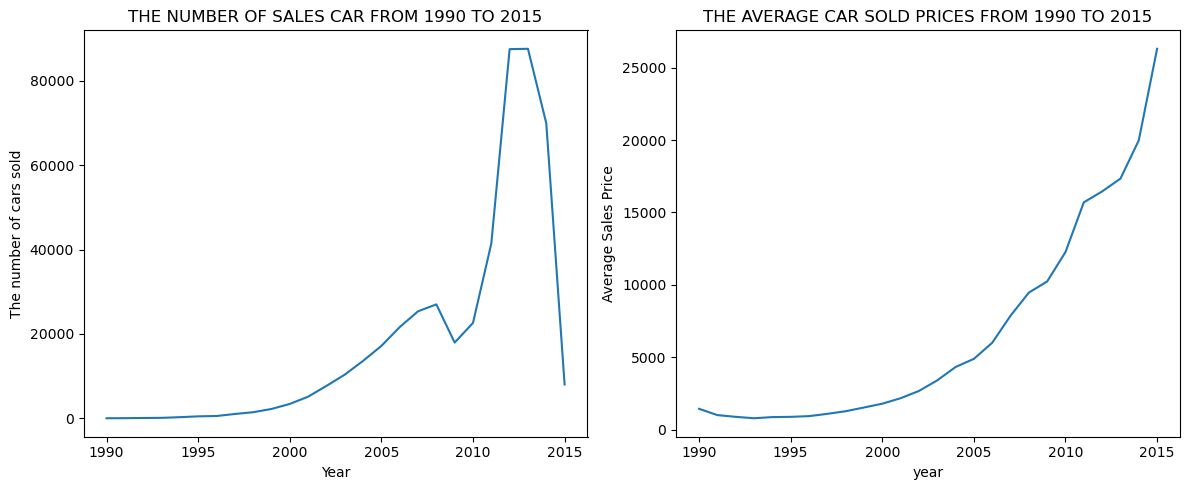

In [31]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.lineplot(x = cars_year["year"], y = cars_year["count"], data = cars_year)
plt.title("THE NUMBER OF SALES CAR FROM 1990 TO 2015")
plt.xlabel("Year")
plt.ylabel("The number of cars sold")

plt.subplot(1,2,2)
sns.lineplot(x = soldprice_year["year"], y = soldprice_year["Average Sales Price"], data = soldprice_year)
plt.title("THE AVERAGE CAR SOLD PRICES FROM 1990 TO 2015")
plt.tight_layout()
plt.show()

- The number of cars sold increase dramatically from 33 cars to slightly over 80000 during 2012 and 2013, before witnessing a significantly decreasing to hundreds of cars in 2015.
- On the contrary, the car prices witness a steady increase from approximately 1000 dollar to roughly 25000 dollar in the given period. Probably, that could be a reason for the decrease of car sales; however, investigation should be conducted.

In [21]:
cars_sum = df_clean.groupby("make").size().reset_index(name="count")
cars_sum.head(6)

,make,count
0,Acura,4504
1,Aston Martin,24
2,Audi,4812
3,BMW,17670
4,Bentley,105
5,Buick,4471


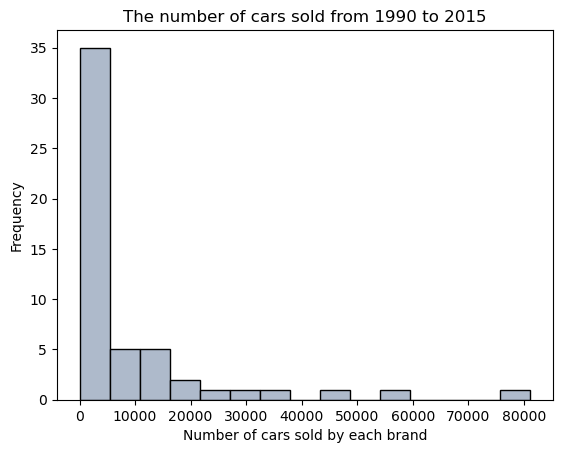

In [22]:
blue = '#aebacb'
black = '#000000'
plt.hist(cars_sum["count"], bins=15, color=blue, edgecolor=black)
plt.title("The number of cars sold from 1990 to 2015")
plt.xlabel("Number of cars sold by each brand")
plt.ylabel("Frequency")

plt.show()

- The distribution is right-skewed, with an outlier. Overall, there are few brands that reach beyond 40000 old car sales.
- Now identify the car brands with the highest and lowest number of car sales.

In [23]:
most_carsold = cars_sum.sort_values(by = ["count"], ascending = False).head(7) # Find 7 most_car_sold
least_carsold = cars_sum.sort_values(by = ["count"], ascending = True).head(7) # Find 7 least_car_sold
average_carsales = cars_sum["count"].median()

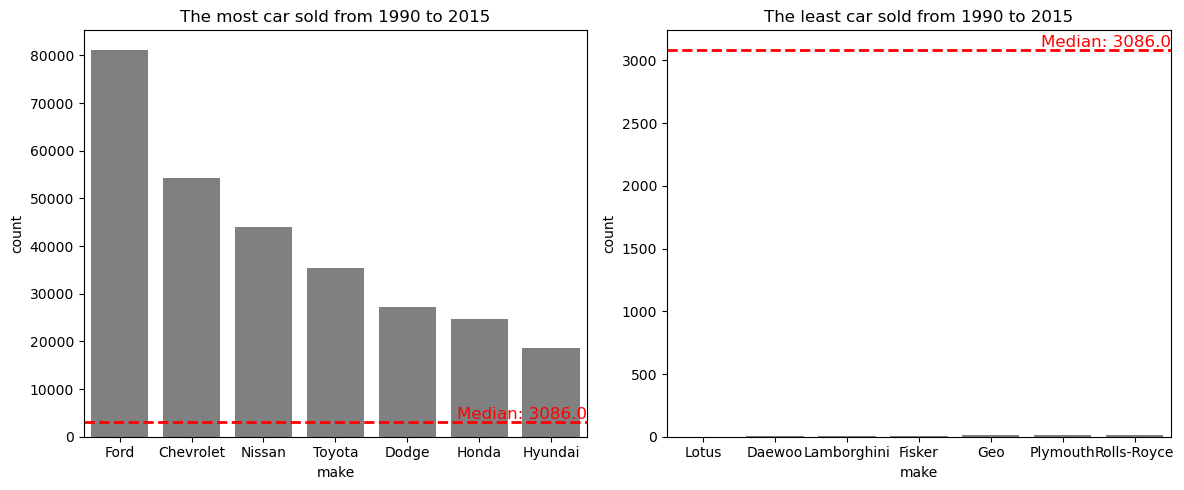

In [24]:
#innitialize colors for bar graphs
grey = "#808080" #specific variant of grey color
red = "#FF0000" #specific variant of red color

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot(x = most_carsold["make"], y = most_carsold["count"], data = most_carsold, color = grey)
plt.title("The most car sold from 1990 to 2015")


plt.axhline(average_carsales, color=red, linestyle='dashed', linewidth=2, label='Median')
# Adding text for the median line
plt.text(len(most_carsold['make']) - 0.5, average_carsales + 1, f'Median: {average_carsales}', color='red', fontsize=12, ha='right', va='bottom')

plt.subplot(1,2,2)
sns.barplot(x = least_carsold["make"], y = least_carsold["count"], data = least_carsold, color = grey)
plt.title("The least car sold from 1990 to 2015")

plt.axhline(average_carsales, color=red, linestyle='dashed', linewidth=2, label='Median')
# Adding text for the median line
plt.text(len(least_carsold['make']) - 0.5, average_carsales + 1, f'Median: {average_carsales}', color='red', fontsize=12, ha='right', va='bottom')

plt.tight_layout()
plt.show()

- The car brands with highest numbers of car sales are Ford, Chervolet, and Nissan.
- The car brands with lowest numbers of car sales are Lotus, Daewoo, and Lamborghini.
- Probably, car brands with highest numbers of car sales cost not as much as that of with lowest numbers of car sales. Or, it may come from other factors such as personal preference. We will figure out in clustering section.